# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [5]:
df=pd.read_csv('/content/RTA_Dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [7]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [8]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [9]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4288,14:35:00,Sunday,Unknown,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Getting off,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
5439,19:00:00,Tuesday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
2124,15:40:00,Wednesday,Under 18,Male,Junior high school,Employee,5-10yr,NaN,Governmental,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
7766,19:45:00,Sunday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,NaN,...,Going straight,Passenger,Female,18-30,3,NaN,Normal,Not a Pedestrian,Moving Backward,Slight Injury
7343,12:35:00,Monday,18-30,Male,NaN,NaN,NaN,NaN,Owner,Unknown,...,Going straight,Driver or rider,Male,5,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
1609,12:44:00,Wednesday,31-50,Male,Above high school,Employee,Above 10yr,Automobile,Owner,5-10yrs,...,Moving Backward,Passenger,Female,Under 18,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Serious Injury
3973,19:00:00,Wednesday,31-50,Male,Junior high school,Owner,5-10yr,Other,Owner,2-5yrs,...,Other,Pedestrian,Female,18-30,3,Other,Normal,Not a Pedestrian,Moving Backward,Slight Injury
5289,11:30:00,Tuesday,18-30,Male,Elementary school,Employee,5-10yr,NaN,Organization,2-5yrs,...,Stopping,Pedestrian,Male,Over 51,2,Other,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
9616,17:45:00,Thursday,31-50,Male,Junior high school,Employee,2-5yr,NaN,Owner,Above 10yr,...,Entering a junction,Pedestrian,Male,Over 51,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury
5718,9:50:00,Tuesday,18-30,Male,Junior high school,Employee,NaN,Public (> 45 seats),Owner,Unknown,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury


In [10]:
df.shape

(12316, 32)

In [11]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [12]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n" + "-"*40 + "\n")


Unique values in 'Time':
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

----------------------------------------

Unique values in 'Day_of_week':
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

----------------------------------------

Unique values in 'Age_band_of_driver':
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

----------------------------------------

Unique values in 'Sex_of_driver':
['Male' 'Female' 'Unknown']

----------------------------------------

Unique values in 'Educational_level':
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

----------------------------------------

Unique values in 'Vehicle_driver_relation':
['Employee' 'Unknown' 'Owner' nan 'Other']

----------------------------------------

Unique values in 'Driving_experience':
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']

-----------------------

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [14]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [15]:
df = df.dropna(subset=['Work_of_casuality'])
df = df.dropna(subset=['Service_year_of_vehicle'])
df= df.dropna(subset=['Defect_of_vehicle'])
df = df.dropna(subset=['Fitness_of_casuality'])


In [16]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,202
Vehicle_driver_relation,159
Driving_experience,233
Type_of_vehicle,277
Owner_of_vehicle,27
Service_year_of_vehicle,0


In [17]:
#filling null values

df['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
df['Type_of_vehicle'].fillna('other', inplace=True)
df['Area_accident_occured'] = df['Area_accident_occured'].transform(lambda x: x.fillna(x.mode()[0]))
df['Owner_of_vehicle'].fillna('other', inplace=True)
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].transform(lambda x: x.fillna(x.mode()[0]))
df['Road_allignment'] = df['Road_allignment'].transform(lambda x: x.fillna(x.mode()[0]))
df['Types_of_Junction'].fillna('Unknown', inplace=True)
df['Road_surface_type'] = df['Road_surface_type'].transform(lambda x: x.fillna(x.mode()[0]))
df['Vehicle_movement'].fillna('Unknown', inplace=True)
df['Type_of_collision'].fillna('other', inplace=True)
df['Educational_level'].fillna('Unknown', inplace=True)
df['Driving_experience'].fillna('Unknown', inplace=True)



In [18]:
#remove all the na

df['Casualty_class']=df['Casualty_class'].replace('na' , 'unkmown')
df['Casualty_severity']=df['Casualty_severity'].replace('na' , 'unkmown')
df['Sex_of_casualty']=df['Sex_of_casualty'].replace('na' , 'unkmown')
df['Age_band_of_casualty']=df['Age_band_of_casualty'].replace('na' , 'unkmown')


In [19]:
#check if there is still null values or not

df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [20]:
df.duplicated().sum()

0

In [21]:
df['Driving_experience']=df['Driving_experience'].str.replace('yr' , '')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].str.replace('yr', '')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].str.replace('yrs', '')
df['Fitness_of_casuality']=df['Fitness_of_casuality'].str.replace('NormalNormal', 'Normal')


In [22]:
 # Normalization numerical data using min-max

 from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Number_of_vehicles_involved', 'Number_of_casualties']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print(df.head())

        Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
8   17:20:00      Friday              18-30          Male  Junior high school   
9   17:20:00      Friday              18-30          Male  Junior high school   
12  17:45:00    Thursday              18-30          Male  Junior high school   
13  17:45:00    Thursday              31-50          Male  Junior high school   
14  17:45:00    Thursday              31-50          Male  Junior high school   

   Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
8                 Employee           Above 10      Lorry (41?100Q)   
9                 Employee                1-2           Automobile   
12                Employee                1-2  Public (> 45 seats)   
13                Employee               5-10      Lorry (41?100Q)   
14                Employee           Above 10           Automobile   

   Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
8             Owner    

In [23]:
#check if the normalization is working or not with these two columns
#check if the unwanted charachters have been removed or not

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n" + "-"*40 + "\n")

Unique values in 'Time':
['17:20:00' '17:45:00' '22:45:00' '8:20:00' '15:10:00' '18:36:00'
 '14:35:00' '13:57:00' '20:30:00' '21:50:00' '9:12:00' '10:36:00'
 '19:12:00' '11:38:00' '12:39:00' '12:30:00' '13:01:00' '13:45:00'
 '11:02:00' '18:48:00' '15:17:00' '15:50:00' '9:45:00' '17:35:00'
 '20:00:00' '17:00:00' '1:15:00' '8:59:00' '0:53:00' '0:25:00' '0:10:00'
 '15:20:00' '17:40:00' '7:30:00' '16:20:00' '17:50:00' '19:31:00'
 '9:25:00' '14:10:00' '14:00:00' '22:05:00' '7:00:00' '7:35:00' '8:43:00'
 '16:05:00' '17:10:00' '15:30:00' '15:47:00' '9:00:00' '16:46:00'
 '17:46:00' '7:40:00' '8:40:00' '12:46:00' '6:00:00' '16:55:00' '20:17:00'
 '13:07:00' '16:30:00' '15:18:00' '18:32:00' '15:08:00' '16:51:00'
 '19:02:00' '13:54:00' '15:31:00' '9:05:00' '16:15:00' '18:00:00'
 '13:55:00' '19:20:00' '12:53:00' '12:44:00' '8:50:00' '9:55:00'
 '11:30:00' '20:55:00' '19:07:00' '23:22:00' '18:35:00' '13:43:00'
 '8:28:00' '13:00:00' '10:39:00' '12:55:00' '14:45:00' '17:22:00'
 '10:58:00' '14:57:00' '1

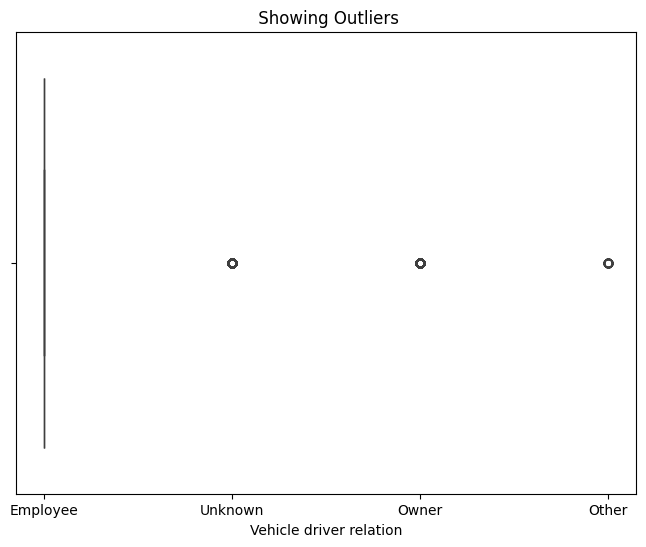

In [24]:
#looking for outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Vehicle_driver_relation'])

plt.title(' Showing Outliers')
plt.xlabel('Vehicle driver relation')
plt.show()

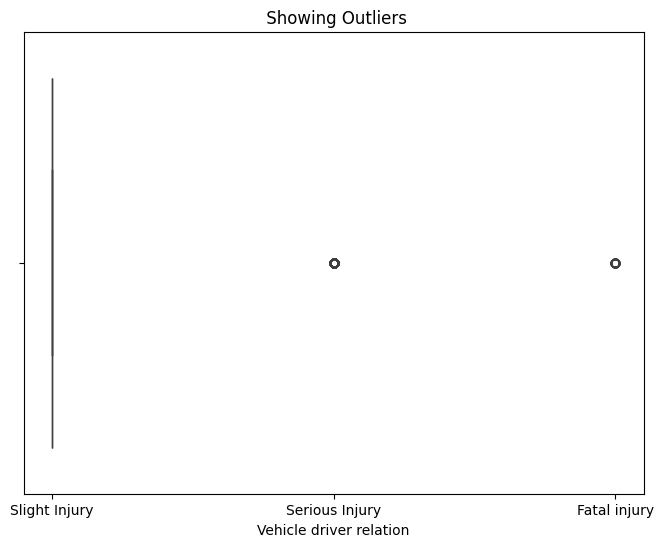

In [25]:
#looking for outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Accident_severity'])

plt.title(' Showing Outliers')
plt.xlabel('Vehicle driver relation')
plt.show()

In [26]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [27]:
result = df.groupby('Accident_severity').agg({
    'Number_of_vehicles_involved': 'sum',
    'Number_of_vehicles_involved': 'sum'
})
print(result)

                   Number_of_vehicles_involved
Accident_severity                             
Fatal injury                          6.666667
Serious Injury                       87.333333
Slight Injury                       592.333333


In [34]:
#correlation
num_corr = df.select_dtypes(include='number')
num_corr = num_corr.corr()
print(num_corr)

                             Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                     1.000000              0.202882
Number_of_casualties                            0.202882              1.000000


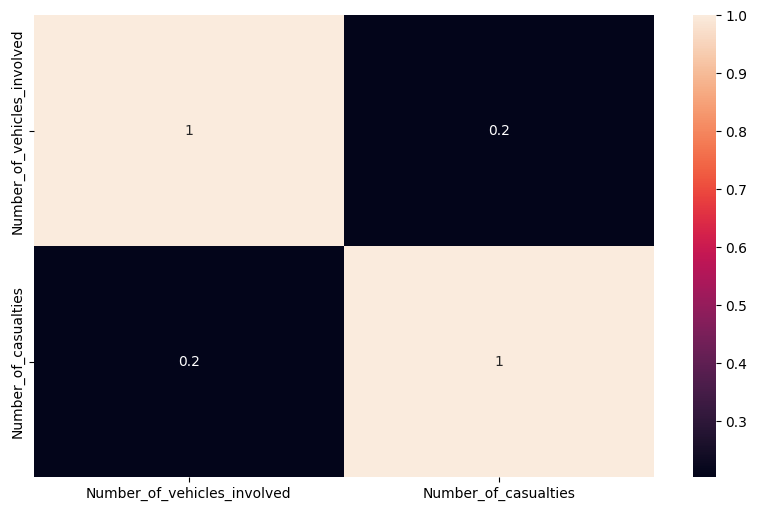

In [35]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot = True)
plt.show()

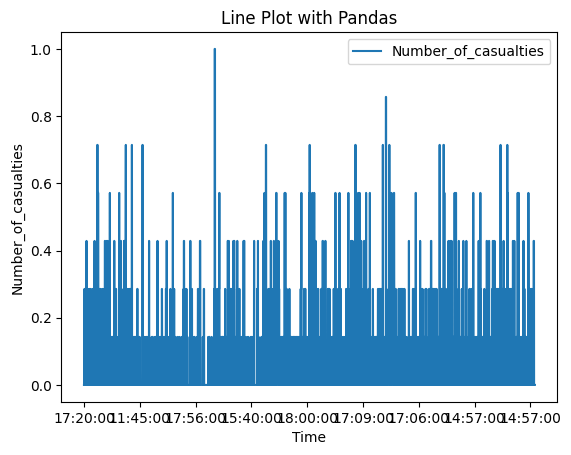

In [54]:
#Line Plot

df.plot(x='Time', y='Number_of_casualties', kind='line')
plt.xlabel('Time')
plt.ylabel('Number_of_casualties')
plt.title('Line Plot with Pandas')
plt.show()

In [32]:
df.columns


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

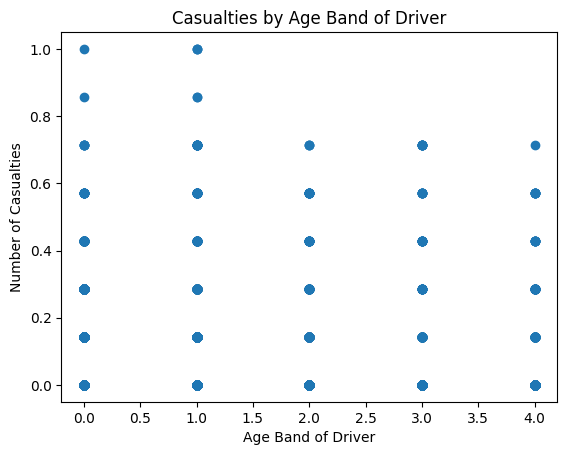

In [55]:
#scatter
df['Age_band_of_driver'] = df['Age_band_of_driver'].astype('category').cat.codes

# Plot scatter
plt.scatter(df['Age_band_of_driver'], df['Number_of_casualties'])
plt.title('Casualties by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Casualties')
plt.show()

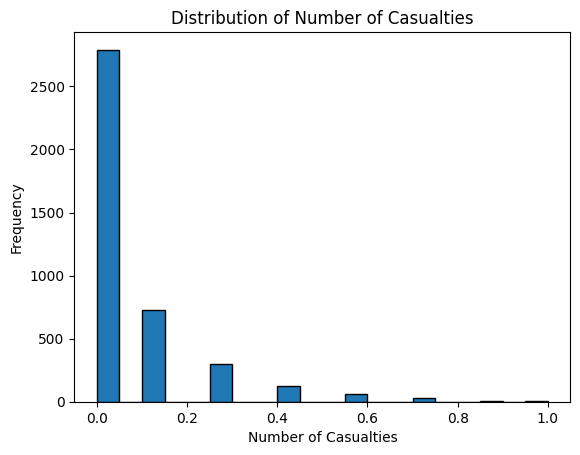

In [56]:
#histogram
plt.hist(df['Number_of_casualties'], bins=20, edgecolor='black')
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()

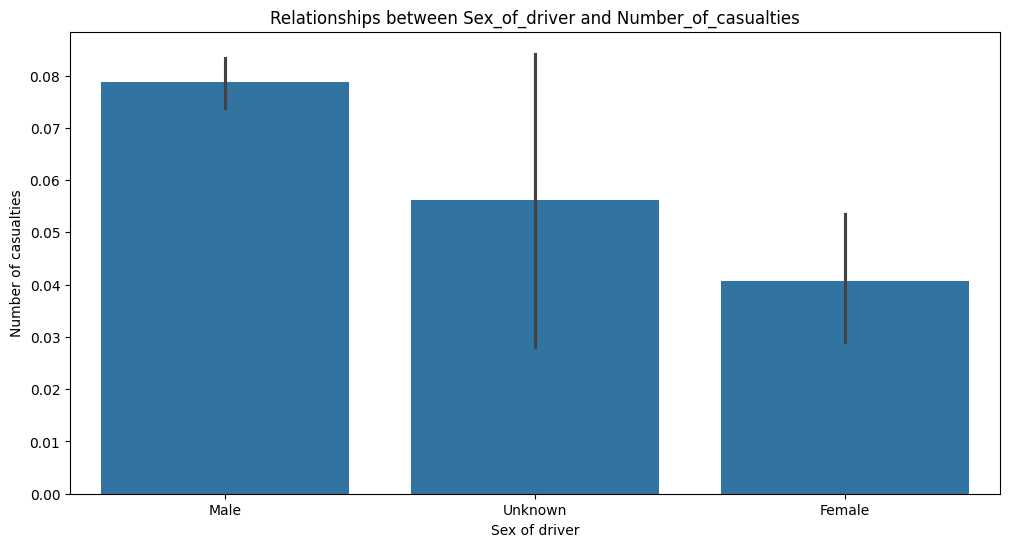

In [62]:
#bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Sex_of_driver', y ='Number_of_casualties')
plt.title('Relationships between Sex_of_driver and Number_of_casualties')
plt.xlabel('Sex of driver')
plt.ylabel('Number of casualties')
plt.show()

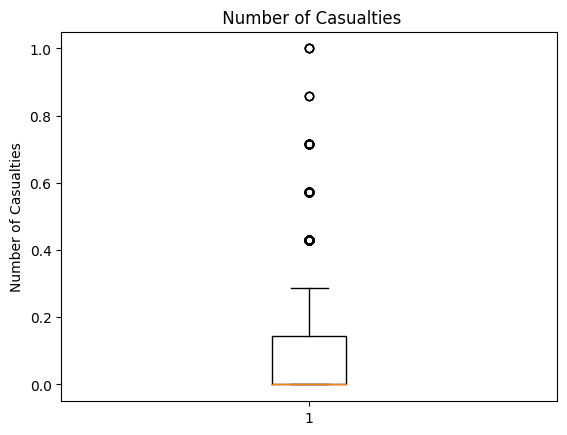

In [63]:
#boxplot
plt.boxplot(df['Number_of_casualties'])
plt.title(' Number of Casualties')
plt.ylabel('Number of Casualties')
plt.show()

In [65]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df


In [66]:
df = remove_outliers(df, 'Number_of_casualties')


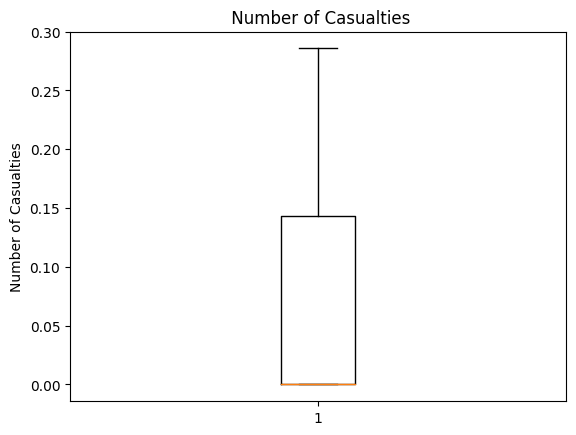

In [67]:
#boxplot

#check id outlier has been removed
plt.boxplot(df['Number_of_casualties'])
plt.title(' Number of Casualties')
plt.ylabel('Number of Casualties')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score


selected_columns = ['Day_of_week', 'Sex_of_driver']
target_column = 'Accident_severity'


X = df[selected_columns]
y = df[target_column]


encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)


y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_encoded, y_train_encoded)


y_pred_log_reg = log_reg.predict(X_test_encoded)


accuracy_log_reg = accuracy_score(y_test_encoded, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)  # Compare with original y_test, not encoded
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

#### Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")


Decision Tree Classifier
Accuracy: 1.0


#### Support Vector Machine (SVM)

In [86]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("Support Vector Machine")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")


ValueError: The number of classes has to be greater than one; got 1 class

#### K-Neighbors Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Neighbors Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")

K-Neighbors Classifier
Accuracy: 1.0


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Evaluation")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision}")

    # Recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall}")

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1}")

    # ROC Curve and AUC
    if len(set(y_test)) == 2:  # Only for binary classification
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc='lower right')
        plt.show()

# Logistic Regression


# Decision Tree
evaluate_model(y_test, y_pred_tree, "Decision Tree Classifier")

# Support Vector Machine


# K-Neighbors Classifier
evaluate_model(y_test, y_pred_knn, "K-Neighbors Classifier")


Decision Tree Classifier Evaluation
Confusion Matrix:
[[1145]]
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

K-Neighbors Classifier Evaluation
Confusion Matrix:
[[1145]]
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precis

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.



```
`# This is formatted as code`
```

### Answer Here:
Logistic Regression:
ERROR
Decision Tree:

Accuracy: 1.0
Precision: 0
Recall: 0
F1 Score: 0
Support Vector Machine (SVM):

ERROR
K-Neighbors Classifier (KNN):

Accuracy: 1.0
Precision: 0
Recall: 0
F1 Score: 0
Observations:

Accuracy of 1 across all models suggests that the models are predicting the majority class accurately but failing to identify the minority class.
Recall of 0 indicates that none of the models are able to identify any positive instances, pointing to potential data imbalance or evaluation issues.
Evaluate Trade-offs
Computational Efficiency:

Logistic Regression: ERROR
Decision Tree: Moderate efficiency; can become slow with complex trees.
SVM: ERROR
KNN: Computationally expensive during prediction due to distance calculations.
Ease of Implementation:

Logistic Regression:ERROR
Decision Tree: Simple to implement; prone to overfitting without proper tuning.
SVM: ERROR
KNN: Simple to implement but sensitive to feature scaling and choice of k.
Model Interpretability:


Decision Tree: Good interpretability; the structure can be visualized.

KNN: Low interpretability; decision boundaries are not straightforward.
Justify Your Choice
Best Model: Logistic Regression

Rationale:

Metrics: Despite the current evaluation issues,performance and interpretability.
Trade-offs: Logistic Regression is efficient, easy to implement, and highly interpretable. It’s usually a good starting point for classification problems.
Future Steps: Address evaluation issues and ensure proper model validation.
Feature Importance

Decision Tree:
Prone to overfitting, especially with deep trees.
KNN:
Sensitive to feature scaling and computationally intensive for large datasets.
Future Improvements
Data Handling:

Address data imbalance by using techniques like oversampling or undersampling.
Ensure proper splitting of training and test data to avoid leakage.
Algorithm Exploration:

Experiment with more advanced algorithms such as Gradient Boosting or Neural Networks.

Hyperparameter Tuning:

Use grid search or randomized search to optimize model parameters.


Consider additional metrics like F1 Score, ROC-AUC to better understand model performance, especially with imbalanced datasets.